# Test Task


# 1.1. Data analysis and feature engineering

## Loading, reading, and investigating the data. Getting the first insights
At the start, we import all necessary libraries, read the CSV file, get the shape of the data and take a look at the first 10 rows.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/skydata_pro.csv')
data.shape

(105000, 18)

In [ ]:
data.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,301.0,1.0,82.0,5.011614e+18,STAR,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,301.0,1.0,123.0,1.607801e+18,GALAXY,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,301.0,2.0,113.0,2.171901e+18,GALAXY,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,301.0,3.0,197.0,6.429279e+17,GALAXY,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,301.0,6.0,301.0,3.266113e+17,QSO,1.528742,290.0,51941.0,365.0
5,1.237651e+18,172.252999,-3.638291,19.11441,18.79149,18.63161,18.70045,18.59555,1231.0,301.0,1.0,20.0,3.670583e+17,QSO,0.864346,326.0,52375.0,54.0
6,1.237671e+18,191.230726,-3.112741,19.41399,18.23463,17.74263,17.58676,17.50622,6005.0,301.0,4.0,143.0,3.289917e+18,STAR,-0.000151,2922.0,54612.0,135.0
7,1.237649e+18,239.601256,0.692352,18.96478,17.75327,17.13841,16.75577,16.49653,745.0,301.0,5.0,540.0,3.863387e+17,GALAXY,0.101707,343.0,51692.0,564.0
8,1.237666e+18,210.129818,21.887381,18.97254,17.95227,17.55222,17.25796,17.23362,4678.0,301.0,1.0,62.0,3.118898e+18,GALAXY,0.066814,2770.0,54510.0,565.0
9,1.237665e+18,215.327913,34.261157,18.54177,17.20249,16.58703,16.15198,15.96899,4512.0,301.0,5.0,112.0,2.071777e+18,GALAXY,0.068231,1840.0,53472.0,442.0


In [ ]:
data['class'].value_counts()

GALAXY    51323
STAR      39296
QSO       14381
Name: class, dtype: int64

We have a Multiclass Classification problem. Target features are labeled, it means we make supervised learning here. The target values in the **"class"** column have three values: GALAXY, STAR, and QSO.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      104529 non-null  float64
 1   ra         104497 non-null  float64
 2   dec        104486 non-null  float64
 3   u          104547 non-null  float64
 4   g          104502 non-null  float64
 5   r          104464 non-null  float64
 6   i          104494 non-null  float64
 7   z          104482 non-null  float64
 8   run        104492 non-null  float64
 9   rerun      104461 non-null  float64
 10  camcol     104504 non-null  float64
 11  field      104524 non-null  float64
 12  specobjid  104502 non-null  float64
 13  class      105000 non-null  object 
 14  redshift   104483 non-null  float64
 15  plate      104490 non-null  float64
 16  mjd        104497 non-null  float64
 17  fiberid    104483 non-null  float64
dtypes: float64(17), object(1)
memory usage: 14.4+ MB


In [ ]:
data.isnull().values.any()

True

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100807 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100807 non-null  float64
 1   ra         100807 non-null  float64
 2   dec        100807 non-null  float64
 3   u          100807 non-null  float64
 4   g          100807 non-null  float64
 5   r          100807 non-null  float64
 6   i          100807 non-null  float64
 7   z          100807 non-null  float64
 8   run        100807 non-null  float64
 9   rerun      100807 non-null  float64
 10  camcol     100807 non-null  float64
 11  field      100807 non-null  float64
 12  specobjid  100807 non-null  float64
 13  class      100807 non-null  object 
 14  redshift   100807 non-null  float64
 15  plate      100807 non-null  float64
 16  mjd        100807 non-null  float64
 17  fiberid    100807 non-null  float64
dtypes: float64(17), object(1)
memory usage: 14.6+ MB


In [ ]:
data['class'].value_counts()

GALAXY    51323
STAR      38302
QSO       11182
Name: class, dtype: int64

I have dropped rows containing NaN cells.

First, let's try to find the meaning of presented features and split them into two groups: the ones that we feed to our learning algorithm; and the features that couldn't influence the learning (e.g. IDs or observation dates).

**u, g, r, i, z** are magnitudes, they are image-specific features and definitely have to participate in the learning.

**objid**, **specobjid** and **fiberid** stand for some object- and equipment-specific IDs, **mjd** is just a date of observation. **run, rerun, camcol, field** relate to metadata and define experiment-related IDs. **plate** stands for the serial number of an observation plate. We do not take into account all these features.

**redshift** is one of the specific features of the spectrograph, **ra** and **dec** are sky coordinates of the observed object. I am not sure about these three columns, but let's assume they do not affect us and we try to train the model without them. (In a real business case these points should be definitely cleared with the client).

Now we investigate **u, g, r, i, z** values. Let's get some statistics for these features.

In [ ]:
data[['u', 'g', 'r', 'i', 'z']].describe()

,u,g,r,i,z
count,100807.000000,100807.000000,100807.000000,100807.000000,100807.000000
mean,18.639018,17.414006,16.890845,16.635667,16.477942
std,0.831870,0.989147,1.138077,1.214738,1.286911
min,10.611810,9.668339,9.005167,8.848403,8.947795
25%,18.214760,16.855870,16.200355,15.869055,15.625090
50%,18.874670,17.520620,16.897940,16.607240,16.437300
75%,19.274130,18.063385,17.596555,17.357220,17.249155
max,19.599950,19.996050,31.990100,32.141470,29.383740


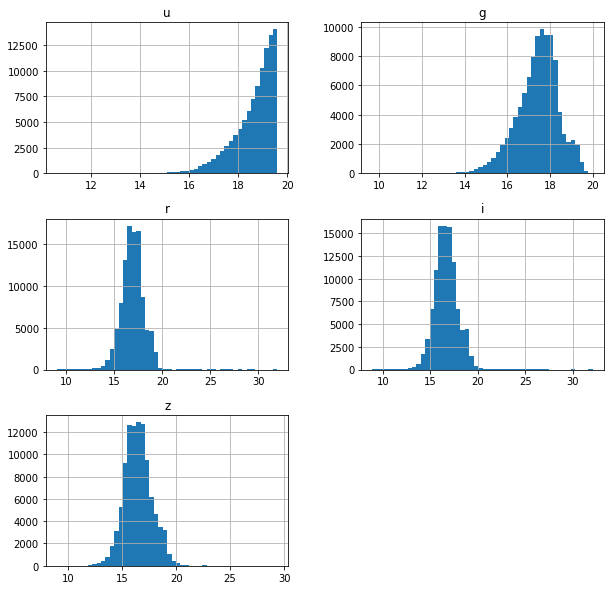

In [ ]:
data[['u', 'g', 'r', 'i', 'z']].hist(bins=50, figsize=(10,10))
plt.show()

We do not see a lot of anomalies here, **r**, **i** and **z** histograms are belly-shaped. **u** and **g** are negatively skewed, which can be hard for detection of patterns for some ML algorithms. All five parameters are in the same range of values and have small vartiability.

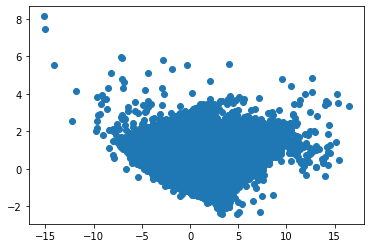

In [ ]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(data[['u', 'g', 'r', 'i', 'z']])
plt.scatter(X2D[:,0], X2D[:,1])

We can see that our data is quite homogeneous. There are some outliers, they could be also removed for better training.

In [ ]:
# scatter_matrix(data[['u', 'g', 'r', 'i', 'z']], figsize=(20,20))

## Pre-processing the data

We create the dataset from the five attributes we discussed and labels from the "class" column.

In [ ]:
X = data[['u', 'g', 'r', 'i', 'z']]
y = data[['class']]

ML algorithms do not perform well when the input attributes have very different scales. It is not our case, but still, we will do normalization: we rescale attributes so they have values from 0 to 1.

In [ ]:
norm = preprocessing.Normalizer().fit(X)
X = norm.transform(X)
X = np.asarray(X)
X

array([[0.43847268, 0.4383106 , 0.4472883 , 0.45404903, 0.45760046],
       [0.50667507, 0.45784781, 0.43221181, 0.4208577 , 0.41197997],
       [0.47404758, 0.44935096, 0.44148595, 0.43772816, 0.43225781],
       ...,
       [0.47908204, 0.44860521, 0.43826252, 0.43470149, 0.43381372],
       [0.48405434, 0.45461835, 0.43958143, 0.4308883 , 0.42440191],
       [0.45664764, 0.45021201, 0.44649635, 0.44151482, 0.44100766]])

Machines do not like words, they like numbers. Therefore we have to encode "STAR", "GALAXY", and "QSO" values.

In [ ]:
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)
y = np.asarray(y)
y = np.squeeze(y)
y

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

Next, we split the dataset into test and train subsets with a standard Scikit-learn function. For the test set we take 20% of the data and we shuffle the data (it is True by default here).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (80645, 5)
X_test shape: (20162, 5)
y_train shape: (80645, 3)
y_test shape: (20162, 3)


In [ ]:
X_test

array([[0.45359897, 0.44705783, 0.44541246, 0.44692864, 0.44300091],
       [0.48619538, 0.45339455, 0.43838737, 0.42991573, 0.42548374],
       [0.49455068, 0.45529593, 0.43665662, 0.42613243, 0.41936546],
       ...,
       [0.41240348, 0.40849521, 0.41821893, 0.41831064, 0.55961073],
       [0.46991685, 0.44159279, 0.44020405, 0.44121752, 0.44240418],
       [0.50565578, 0.45086456, 0.43053663, 0.42354472, 0.41985887]])

## 1.2. Training and evaluating the model

The most common methods for classification are **Logistic Regression**, **k-Nearest Neighbors**, **Decision Trees**, **Support Vector Machine**, **Naive Bayes**, or more sophisticated methods, such as **Random Forest** or **Neural Network**.

**k-Nearest Neighbors** does not work well with big datasets and with many dimensions. As our dataset is homogeneous and nonlinear, using **Decision Trees** and **SVM** is not a good idea. **Random Forest**, **Nonlinear SVM**, and **Voting Classifiers** could also perform well in this task. I have chosen **Random Forest** classifier here. Random Forest is an ensemple learning algorithm of Decision Trees.

In [ ]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rnd_clf.predict(X_test)
print('Precision:', metrics.precision_score(y_test, y_pred, average=None))
print('Recall:', metrics.recall_score(y_test, y_pred, average=None))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average=None))

Precision: [0.97187225 0.95358456 0.96338762]
Recall: [0.96705539 0.93468468 0.96628332]
F1 Score: [0.96945784 0.94404004 0.9648333 ]


Save the model in binary format.

In [ ]:
import pickle

with open('/content/gdrive/My Drive/saved_model.pkl', 'wb') as f:
    pickle.dump(rnd_clf, f)